In [ ]:
#below is the code to import the libraries first. Also, cases variable is created to load the data using pandas
#function pd.read_csv.
#A greeting variable is created to contain the input for name display. the next lines of code diplay a print statament
#for MIS 433 COVID-19 report. Finally the cases variable is manipulated to drop some columns not needed using the drop
#method. Then the cases variable is melted to restrucute the df, and rename a dates and cases column.
#finally the melted df is filtered by Country_Region so that only data filtered showing the USA information. 
#some renaming of columns was also done to undestand data better. 

import pandas as pd
import matplotlib.pyplot as plt

cases= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
greeting=input('Hello. Please enter your name: ')
print('***MIS 433 COVID-19 REPORT***')
cases.drop(['UID','iso2','iso3','code3','FIPS','Lat','Long_'],axis=1, inplace=True)
cases_melt= pd.melt(cases, id_vars=['Admin2','Province_State','Country_Region','Combined_Key'],var_name='dates',value_name='cases')
usa_filter= cases_melt[cases_melt['Country_Region']=='US']
usa_filter.rename(columns={'Admin2':'county','Province_State':'state'}, inplace=True)

#the code below is used to change the format of date using the pd.to_datime function so that we calculations
#can be perfomed and print statements can be derived showing the calculations.
#usa_filter variable is used to change the date format.
#then duration variable is created to display the calculations for days since covid outbreak, and then print. 
#after changing the format to to_datetime , the rest of the calculations regarding USA can be perfomed
#and then printed.

usa_filter.dates= pd.to_datetime(usa_filter['dates'])
print('USA INFORMATION AS OF  ', usa_filter.dates.max().strftime('%m/%d/%Y'))
duration= usa_filter.dates.max()- usa_filter.dates.min()
print(' - Number of days since the outbreak of COVID-19:',duration.days)
usa_total_df= usa_filter.groupby(['dates']).sum()
usa_total_df=usa_total_df.reset_index()
usa_final_total= usa_total_df['cases'].max()
print(' - Total reported cases:',f"{usa_final_total:,}")


# The code below represents the variables used and created to generate the state level calculations
#to later generate print statemnts that display the calculations. 
#the most recent information is generated by using the state_filter.dates.max 
#the total reported cases is generated by the state_total_final variable
#also the state_total_df had to be reformated by using the reset_index
# using the state_total variable, a new column was derived, so that calculations could be later perfomed
#to generate the new_cases column, the diff()method was used.

state= input(greeting + ''' , enter a state to view their COVID-19 information :''')
print('Found information for ',state,'.')
state_filter= usa_filter[usa_filter['state']== state]
print(state,'INFORMATION AS OF ',state_filter.dates.max().strftime('%m/%d/%Y'))
state_total_df= state_filter.groupby(['dates']).sum()
state_total_df= state_total_df.reset_index()
state_final_total=state_total_df['cases'].max()
print(' -',state,'has a reported total of ',f"{state_final_total:,}",'cases.')

#diff method used to generate a new_cases column, and then do calculations .
#then the variable last_seven created to get the last 7 days data, then total last_seven variable
#created to get the total new cases for the state
#prior_14 variable created to obtain the previous 7 days total number of cases.
#finally, an if statement was created indicating that if total_last_seven is greater than total_prior seven
# it is an increase, else it would be a decrease. 
#last step was to print and display the calculations by referencing previous variables created.
state_total_df['new_cases']=state_total_df['cases'].diff()
last_seven= state_total_df.tail(7)
total_last_seven=last_seven['new_cases'].sum()
prior_14=state_total_df.tail(14)
total_prior_seven= prior_14['new_cases'].head(7).sum()
if total_last_seven > total_prior_seven:
    status2= 'an increase'
else:
    status2= 'a decrease'
print(' - Over the last 7 days',state, 'has reported a total of ',f"{total_last_seven:,}", 'new cases, which is\n ',status2, 'compared to the previous 7 days where',f"{total_prior_seven:,}",'cases were reported.')
largest_number=state_total_df['new_cases'].max()
date_largest = state_total_df[state_total_df['new_cases'] == largest_number]['dates'].iloc[0]
date_largest = date_largest.strftime('%m/%d/%Y')
print('  -The largest number of new cases reported in one day was',f"{largest_number:,}",'on',date_largest)
print(greeting, 'please select which data visualization to view:\n''Enter 1 to view the cumulative count of cases for', state, '\nEnter 2 to view the cumulative count of cases for', state,  'and USA')
enter_number= input('Enter number :')

#below is the if statement code I created so that the user could pick between either 1 or 2 for the visualizations.
# an if and elif statement was creted to satisfy the conditions. If user picked 1, it will display state level information
# if user enters 1 in the if portion, the code to only display state visual is below. The state level uses 
#matplotlib and its functions to create a bar chart. the code also has the customization that was added. If 
#the user enters2, then the elif condition satisfies that request and will then use the code for figure and axes to
#display the side by side comparisson of usa total cases vs state level total cases.

if enter_number == '1':
    plt.figure(figsize= (13,6))
    plt.bar(state_total_df.dates,state_total_df.cases)
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    plt.style.use("ggplot")
    plt.xlabel('Date')
    plt.ylabel('Total Cases')
    plt.title(state   + 'COVID-19 Cases')
    plt.xticks(rotation=45)
    plt.show()
elif enter_number=='2':
    
    # below is the code that I created for creating the figure and the two axes.
    #then I created axes 1 and began to customize the plot focusing on the state_total_df to 
    #plot  for dates and total reported cases in the state. I also had to rotate the labels on x
    #data for plotting, and also had to set the y axis so i didnt display in scientific notation. Then some 
    #extra customization was added , to get labels for axis and titles.
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('MIS 433 COVID-19 Report for '+ greeting ,fontsize=14)
    ax1.bar(usa_total_df['dates'],usa_total_df['cases'])
    ax1.set_title(state + 'COVID-19 Cases',fontsize=10)
    ax1.set_ylabel('Total Cases')
    ax1.set_xlabel('Date')
    ax1.tick_params(axis='x',labelrotation=45)
    ax1.get_yaxis().get_major_formatter().set_scientific(False)
    fig.tight_layout()
    
    
    #below is the code that I creted for axes2 in the figure, which uses the usa_total_df, and will plot
    #dates and total cases for the USA.I customized the y axis, the x axis, titles and also had to adjust the 
    #the rotation for the x axis to 45 degrees, and I also had to reformat the scientific notation so that it 
    #would display the total cases in millions. 
    
    
    ax2.bar(usa_total_df['dates'],usa_total_df['cases'])
    ax2.set_title('USA COVID-19 Cases',fontsize=10)
    ax2.set_ylabel('Total Cases')
    ax2.set_xlabel('Date')
    ax2.tick_params(axis='x',labelrotation=45)
    ax2.get_yaxis().get_major_formatter().set_scientific(False)
    fig.tight_layout()
    plt.show()
    

    
    
    
    
    
    
    
    
    
    
    
    
    







In [128]:
def Mauricio_covid():
    import pandas as pd
    import matplotlib.pyplot as plt

    import pandas as pd
    import matplotlib.pyplot as plt

    cases= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    greeting=input('Hello. Please enter your name: ')
    print('***MIS 433 COVID-19 REPORT***')
    cases.drop(['UID','iso2','iso3','code3','FIPS','Lat','Long_'],axis=1, inplace=True)
    cases_melt= pd.melt(cases, id_vars=['Admin2','Province_State','Country_Region','Combined_Key'],var_name='dates',value_name='cases')
    usa_filter= cases_melt[cases_melt['Country_Region']=='US']
    usa_filter.rename(columns={'Admin2':'county','Province_State':'state'}, inplace=True)
    usa_filter.dates= pd.to_datetime(usa_filter['dates'])
    print('USA INFORMATION AS OF  ', usa_filter.dates.max().strftime('%m/%d/%Y'))
    duration= usa_filter.dates.max()- usa_filter.dates.min()
    print(' - Number of days since the outbreak of COVID-19:',duration.days)
    usa_total_df= usa_filter.groupby(['dates']).sum()
    usa_total_df=usa_total_df.reset_index()
    usa_final_total= usa_total_df['cases'].max()
    print(' - Total reported cases:',f"{usa_final_total:,}")
    state= input(greeting + ''' , enter a state to view their COVID-19 information :''')
    print('Found information for ',state,'.')
    state_filter= usa_filter[usa_filter['state']== state]
    print(state,'INFORMATION AS OF ',state_filter.dates.max().strftime('%m/%d/%Y'))
    state_total_df= state_filter.groupby(['dates']).sum()
    state_total_df= state_total_df.reset_index()
    state_final_total=state_total_df['cases'].max()
    print(' -',state,'has a reported total of ',f"{state_final_total:,}",'cases.')

    state_total_df['new_cases']=state_total_df['cases'].diff()
    last_seven= state_total_df.tail(7)
    total_last_seven=last_seven['new_cases'].sum()
    prior_14=state_total_df.tail(14)
    total_prior_seven= prior_14['new_cases'].head(7).sum()
    if total_last_seven > total_prior_seven:
        status2= 'an increase'
    else:
        status2= 'a decrease'
    print(' - Over the last 7 days',state, 'has reported a total of ',f"{total_last_seven:,}", 'new cases, which is\n ',status2, 'compared to the previous 7 days where',f"{total_prior_seven:,}",'cases were reported.')
    largest_number=state_total_df['new_cases'].max()
    date_largest = state_total_df[state_total_df['new_cases'] == largest_number]['dates'].iloc[0]
    date_largest = date_largest.strftime('%m/%d/%Y')
    print('  -The largest number of new cases reported in one day was',f"{largest_number:,}",'on',date_largest)
    print(greeting, 'please select which data visualization to view:\n''Enter 1 to view the cumulative count of cases for', state, '\nEnter 2 to view the cumulative count of cases for', state,  'and USA')
    enter_number= input('Enter number :')
    if enter_number == '1':
        plt.figure(figsize= (13,6))
        plt.bar(state_total_df.dates,state_total_df.cases)
        plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
        plt.style.use("ggplot")
        plt.xlabel('Date')
        plt.ylabel('Total Cases')
        plt.title(state   + 'COVID-19 Cases')
        plt.xticks(rotation=45)
        plt.show()
    elif enter_number=='2':
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.suptitle('MIS 433 COVID-19 Report for '+ greeting ,fontsize=14)
        ax1.bar(usa_total_df['dates'],usa_total_df['cases'])
        ax1.set_title(state + 'COVID-19 Cases',fontsize=10)
        ax1.set_ylabel('Total Cases')
        ax1.set_xlabel('Date')
        ax1.tick_params(axis='x',labelrotation=45)
        ax1.get_yaxis().get_major_formatter().set_scientific(False)
        fig.tight_layout()

        ax2.bar(usa_total_df['dates'],usa_total_df['cases'])
        ax2.set_title('USA COVID-19 Cases',fontsize=10)
        ax2.set_ylabel('Total Cases')
        ax2.set_xlabel('Date')
        ax2.tick_params(axis='x',labelrotation=45)
        ax2.get_yaxis().get_major_formatter().set_scientific(False)
        fig.tight_layout()
        plt.show()
    


Hello. Please enter your name: Mauricio
***MIS 433 COVID-19 REPORT***
USA INFORMATION AS OF   05/07/2022
 - Number of days since the outbreak of COVID-19: 836
 - Total reported cases: 81,858,744
Mauricio , enter a state to view their COVID-19 information :California
Found information for  California .
California INFORMATION AS OF  05/07/2022
 - California has a reported total of  9,288,293 cases.
 - Over the last 7 days California has reported a total of  53,988.0 new cases, which is
  an increase compared to the previous 7 days where 41,567.0 cases were reported.
  -The largest number of new cases reported in one day was 207,121.0 on 01/16/2022
Mauricio please select which data visualization to view:
Enter 1 to view the cumulative count of cases for California 
Enter 2 to view the cumulative count of cases for California and USA
Enter number :2


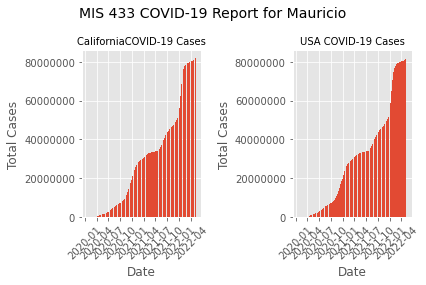

In [129]:
Mauricio_covid()

Hello. Please enter your name: Mauricio
***MIS 433 COVID-19 REPORT***
USA INFORMATION AS OF   05/07/2022
 - Number of days since the outbreak of COVID-19: 836
 - Total reported cases: 81,858,744
Mauricio , enter a state to view their COVID-19 information :Texas
Found information for  Texas .
Texas INFORMATION AS OF  05/07/2022
 - Texas has a reported total of  6,846,849 cases.
 - Over the last 7 days Texas has reported a total of  21,015.0 new cases, which is
  an increase compared to the previous 7 days where 17,549.0 cases were reported.
  -The largest number of new cases reported in one day was 98,355.0 on 01/21/2022
Mauricio please select which data visualization to view:
Enter 1 to view the cumulative count of cases for Texas 
Enter 2 to view the cumulative count of cases for Texas and USA
Enter number :1


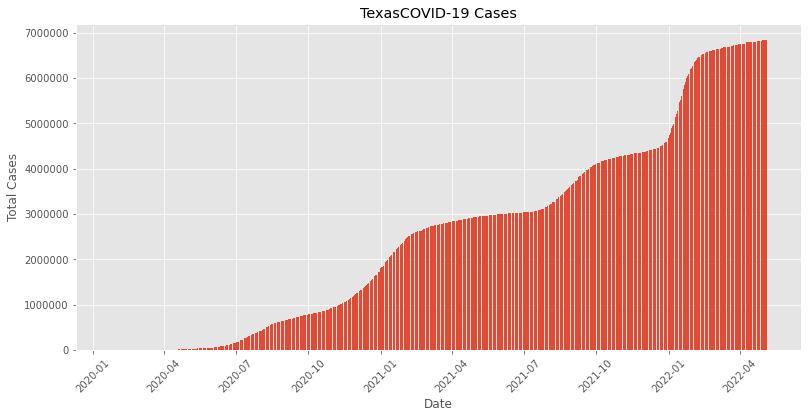

In [131]:
Mauricio_covid()